In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import math
from math import gamma
from operator import mul
from functools import reduce

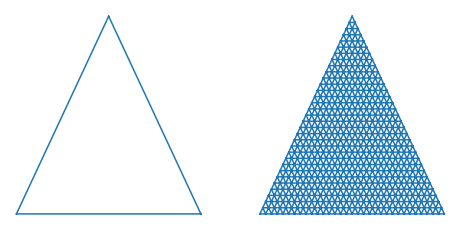

In [15]:
corners = np.array([[0,0],[1,0],[0.5,math.sqrt(3)*0.5]])
triangle = tri.Triangulation(corners[:,0],corners[:,1])
refiner = tri.UniformTriRefiner(triangle)
trimesh = refiner.refine_triangulation(subdiv=5)

plt.figure(figsize=(8,4))
for (i,mesh) in enumerate((triangle,trimesh)):
    plt.subplot(1,2,i+1)
    plt.triplot(mesh)
    plt.axis('off')
plt.show()



midpoints = [(corners[(i+1)%3] + corners[(i+2)%3])/2.0 for i in range(3)]

def xy2bc(xy,tol=1e-3):
    s = [(corners[i]-midpoints[i]).dot(xy - midpoints[i])/0.75 for i in range(3)]
    return np.clip(s,tol,1.0-tol)

In [16]:
class Dir(object):
    def __init__(self,a):
        self.alpha = a
        self.coef = gamma(np.sum(a))/reduce(mul,[gamma(a_i) for a_i in self.alpha])
        
    def pdf(self,x):
        return self.coef*reduce(mul,[xx**(aa-1) for (xx,aa) in zip(x,self.alpha)])

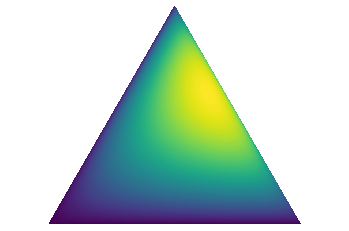

In [35]:
def draw_pdf_contours(dist,nlevels=200,subdiv=8,**kwargs):
    refiner = tri.UniformTriRefiner(triangle)
    trimesh = refiner.refine_triangulation(subdiv=subdiv)
    pvals = [dist.pdf(xy2bc(xy)) for xy in zip(trimesh.x,trimesh.y)]
    plt.tricontourf(trimesh,pvals,nlevels,**kwargs)
    plt.axis('equal')
    plt.xlim(0,1)
    plt.ylim(0,math.sqrt(3)*0.5)
    plt.axis('off')

    
draw_pdf_contours(Dir([1.1,1.5,1.9]))